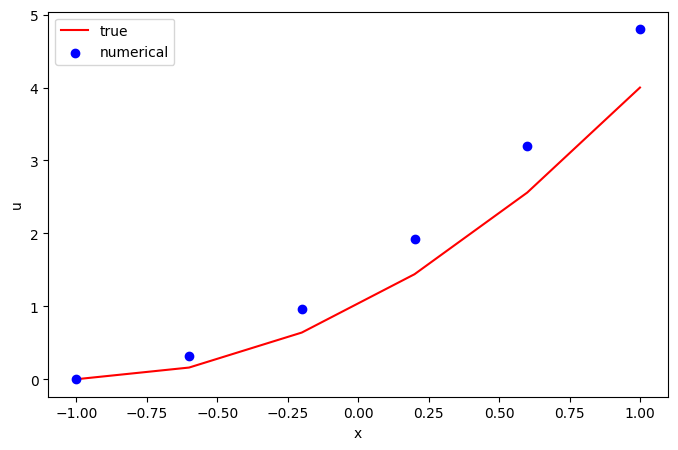

In [5]:
import numpy as np
import matplotlib.pyplot as plt

L = 2
N = 5
deltaX = 2/N

# 构造两个空矩阵，用来放系数
A = np.zeros((N+1,N+1))
b = np.zeros((N+1,1))

# 左侧边界
A[0,0] = 1

# 右侧边界
A[N,N] = 1
A[N,N-1] =-1

# 中间节点
for i in range(1,N):
    A[i,i-1] = 1
    A[i,i] = -2
    A[i,i+1] = 1

# 对于b矩阵赋值
b[0] = 0
b[N] = 4*deltaX
for i in range(1,N):
    b[i] = 2 * deltaX * deltaX

# 直接求解矩阵
u_solve = np.linalg.solve(A,b)

# 图形显示结果
x = np.linspace(-1,1,N+1)
# 解析解
y = (x + 1 ) **2

plt.figure(figsize=(8,5))
plt.plot(x,y,label='true',color = 'red',zorder = 1)
plt.scatter(x,u_solve.reshape(1,-1)[0],color = 'blue',label = 'numerical',zorder =2)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term
Compiling model...
Building feed-forward neural network...
'build' took 0.069563 s



c:\ProgramData\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.508168 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.05e+00, 9.77e-02, 1.80e+01]    [4.02e+00, 9.77e-02, 1.80e+01]    []  
1000      [1.03e-03, 1.09e-08, 6.24e-07]    [8.07e-04, 1.09e-08, 6.24e-07]    []  
2000      [1.91e-04, 4.52e-06, 1.43e-06]    [1.56e-04, 4.52e-06, 1.43e-06]    []  
3000      [5.87e-05, 2.35e-08, 3.33e-09]    [4.58e-05, 2.35e-08, 3.33e-09]    []  
4000      [2.19e-05, 7.29e-08, 2.75e-08]    [1.70e-05, 7.29e-08, 2.75e-08]    []  
5000      [1.84e-05, 4.22e-05, 2.29e-05]    [1.55e-05, 4.22e-05, 2.29e-05]    []  

Best model at step 4000:
  train loss: 2.20e-05
  test loss: 1.71e-05
  test metric: []

'train' took 3.833804 s



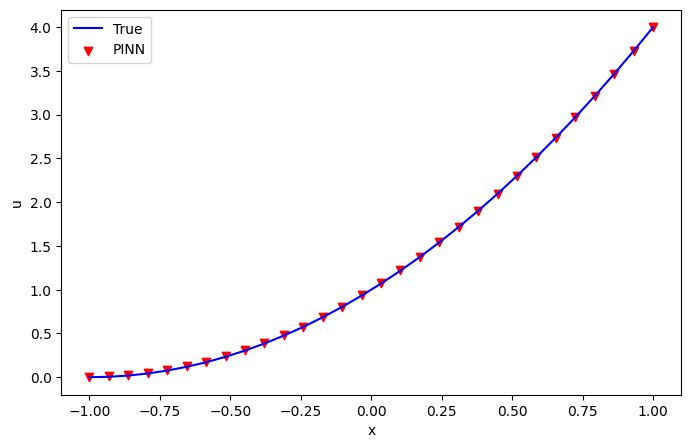

In [6]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# 定义PDE方程损失
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - 2

# 左边界
def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)

# 右边界
def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)

# 定义计算区域[-1,1]
geom = dde.geometry.Interval(-1, 1)

# 定义左右两侧的边界条件
bc_l = dde.icbc.DirichletBC(geom, lambda x:0, boundary_l)
bc_r = dde.icbc.NeumannBC(geom, lambda x:4, boundary_r)

# 定义PDE方程
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, num_test=100)

# 定义全连接神经网络，包括1个输入层，3个隐藏层，每层50个神经元，以及1个输出层
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

# 定义Model，采用adam优化器，学习率使用0.001
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# 训练网络
losshistory, train_state = model.train(iterations=5000)

# 查看结果
x  = np.linspace(-1,1,30).reshape(-1,1)
y_ture = (x + 1) ** 2
u_predict = model.predict(x)

u_predict = u_predict.reshape(1,-1)[0]

plt.figure(figsize=(8,5))
plt.plot(x, y_ture, 'b-', label='True')
plt.scatter(x,u_predict,marker='v',color = 'red',label= 'PINN')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()

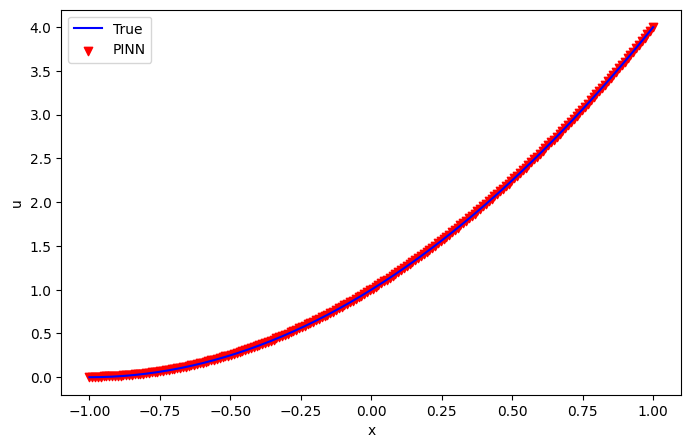

In [9]:
# 查看结果
x  = np.linspace(-1,1,200).reshape(-1,1)
y_ture = (x + 1) ** 2
u_predict = model.predict(x)

u_predict = u_predict.reshape(1,-1)[0]

plt.figure(figsize=(8,5))
plt.plot(x, y_ture, 'b-', label='True')
plt.scatter(x,u_predict,marker='v',color = 'red',label= 'PINN')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()